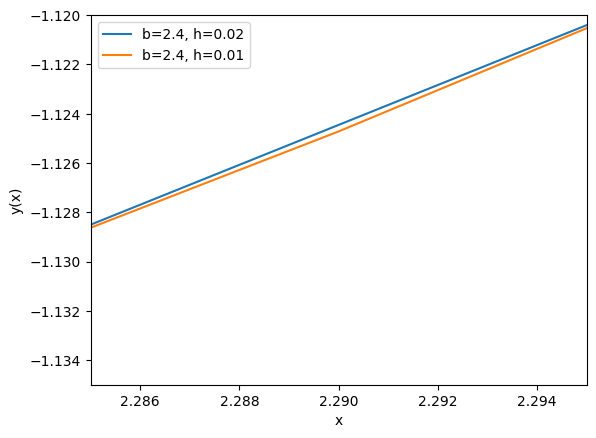

[7.797301396898308e-05, 1.9370177710105924e-05]


In [67]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, z):
    return  - (x**2 + 3) * z

def f1(x, z):
    return np.exp(x) * (x**2 - 4) - (x**2 + 3) * z

def solve_system(b, h, y0, z0):
    x = np.arange(0, b + h, h)
    n = len(x)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0
    
    for i in range(n - 1):
        # Предсказание (Эйлер)
        z_pred = z[i] + h * f(x[i], z[i])
        y_pred = y[i] + h * z[i]
        
        # Коррекция (пересчет)
        z[i+1] = z[i] + h/2 * (f(x[i], z[i]) + f(x[i+1], z_pred))
        y[i+1] = y[i] + h/2 * (z[i] + z_pred)
    
    return x, y

def solve_system1(b, h, y0, z0):
    x = np.arange(0, b + h, h)
    n = len(x)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0
    
    for i in range(n - 1):
        # Предсказание (Эйлер)
        z_pred = z[i] + h * f1(x[i], z[i])
        y_pred = y[i] + h * z[i]
        
        # Коррекция (пересчет)
        z[i+1] = z[i] + h/2 * (f1(x[i], z[i]) + f1(x[i+1], z_pred))
        y[i+1] = y[i] + h/2 * (z[i] + z_pred)
    
    return x, y

# Находим y1, y2 и y_частное
eps=[]
for b in [2.4]:
    for h in [0.02, 0.01]:
        # Решение y1 (y(0)=1, z(0)=0)
        x, y1 = solve_system(b, h, 1, 0)

        # Решение y2 (y(0)=0, z(0)=1)
        x, y2 = solve_system(b, h, 0, 1)

        # Частное решение (y(0)=0, z(0)=0)
        x, y_part = solve_system1(b, h, 0, 0)

        # Определяем C1, C2
        C1 = 1
        C2 = (-1 - y1[-1] - y_part[-1]) / y2[-1]

        # Общее решение
        y = C1 * y1 + C2 * y2 + y_part



        # Решение y1 (y(0)=1, z(0)=0)
        xf, y1f = solve_system(b, h/2, 1, 0)

        # Решение y2 (y(0)=0, z(0)=1)
        xf, y2f = solve_system(b, h/2, 0, 1)

        # Частное решение (y(0)=0, z(0)=0)
        xf, y_partf = solve_system1(b, h/2, 0, 0)

        # Определяем C1, C2
        C1f = 1
        C2f = (-1 - y1f[-1] - y_partf[-1]) / y2f[-1]

        # Общее решение
        yf = C1f * y1f + C2f * y2f + y_partf

        diff=np.max(np.abs(y-yf[::2]))/3
        eps.append(diff)

        # print("x \t y(x)")
        # for xi, yi in zip(x, y_part):
        #     print(f"{xi:.4f} \t {yi:.6f}")

        # График
        plt.plot(x, y, label=f'b={b}, h={h}')
        plt.xlabel('x')
        plt.ylabel('y(x)')
        plt.legend()
        plt.grid()
plt.xlim(2.285, 2.295)
plt.ylim(-1.135, -1.12)
plt.show()
print(eps)